In [ ]:
%matplotlib widget
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
from Stokes_as_fn import run
import pandas as pd
import numpy as np
from tqdm import tqdm
h_values = [1, 0.5, 0.2, 0.1, 0.05]
epsilon_values = [0.001, 0.0005, 0.0001, 0.00005, 0.00001] # plutôt petit
gamma_values = [1, 10, 20, 50, 100] # plutôt grand
default_values = {
    "gamma": 20,
    "epsilon": 0.0001,
    "h": 0.1}
criteria = ["duration", "condition", "memory_usage", "divergence_vector_field", "error_u", "error_p"]

In [ ]:
# df = pd.DataFrame(columns=["method", "duration", "condition", "memory_usage", "divergence_vector_field", "h", "epsilon", "gamma", "tested_param"])

# for h in tqdm(h_values):
#     dico = run(h=h)
#     df_ = pd.DataFrame.from_dict(dico)
#     df_["tested_param"] = "h"
#     df = pd.concat([df, df_], ignore_index=True)

# for eps in tqdm(epsilon_values):
#     dico = run(epsilon=eps)
#     df_ = pd.DataFrame.from_dict(dico)
#     df_["tested_param"] = "epsilon"
#     df = pd.concat([df, df_], ignore_index=True)

# for gamma in tqdm(gamma_values):
#     dico = run(Gamma=gamma)
#     df_ = pd.DataFrame.from_dict(dico)
#     df_["tested_param"] = "gamma"
#     df = pd.concat([df, df_], ignore_index=True)

# df.to_csv("results.csv")


In [ ]:
df = pd.read_csv("results.csv")

In [18]:
def plot_results(tested_param, methods="all", use_legends=(True, False, False, False, False, False)):
    condition = df["tested_param"]==tested_param
    # condition = True # (df["tested_param"]==test_param)
    # if(tested_param != "h"):
    #     condition = condition & (df["h"]==default_values["h"])
    # if(tested_param != "gamma"):
    #     condition = condition & (df["gamma"]==default_values["gamma"])
    # if(tested_param != "epsilon"):
    #     condition = condition & (df["epsilon"]==default_values["epsilon"])

    if(methods != "all" and hasattr(methods, '__iter__')):
        condition_method = False
        for method in methods:
            condition_method = condition_method | (df["method"]==method)
        condition = condition & condition_method
    fig, axes = plt.subplots(3, 2, figsize=(10, 8), constrained_layout=True)
    axes = axes.flatten()
    for ax, criterium, use_legend in zip(axes, criteria, use_legends):
        ax.set_yscale("log")
        ax.set_xscale("log")
        sns.scatterplot(data=df[condition], x=tested_param, y=criterium, hue="method", ax=ax, legend=use_legend)
    return fig, ax

(<Figure size 1000x800 with 6 Axes>,
 <AxesSubplot:xlabel='h', ylabel='error_p'>)

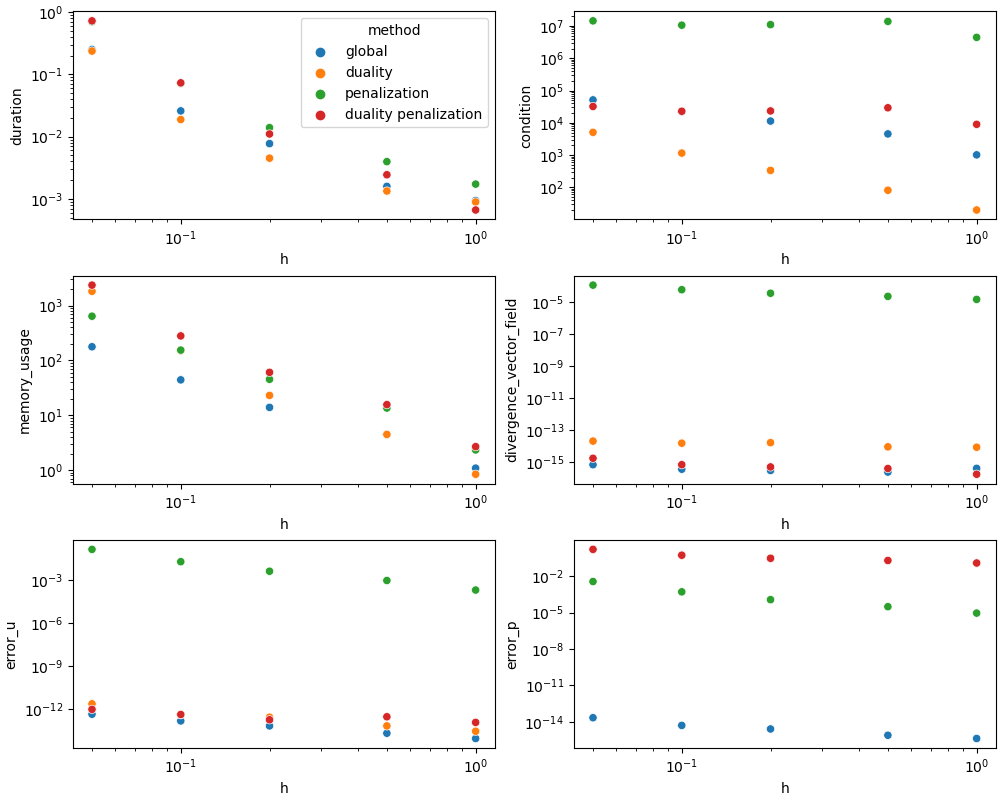

In [19]:
plot_results("h")

(<Figure size 1000x800 with 6 Axes>,
 <AxesSubplot:xlabel='epsilon', ylabel='error_p'>)

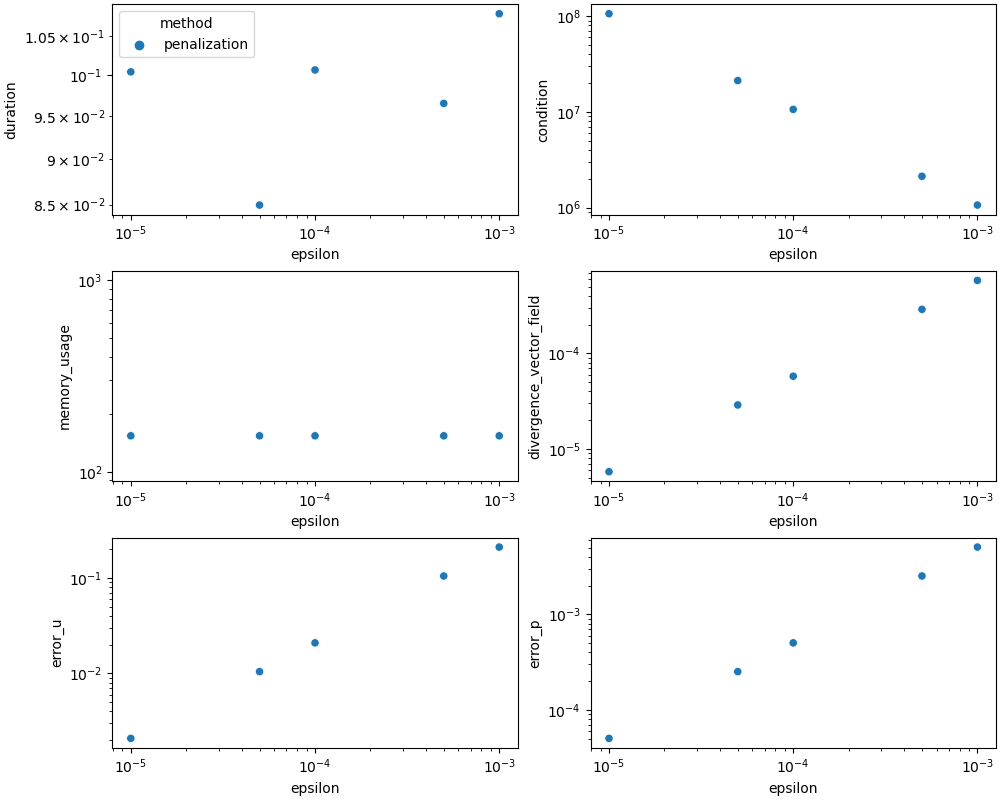

In [21]:
plot_results("epsilon", methods=["penalization"])

(<Figure size 1000x800 with 6 Axes>,
 <AxesSubplot:xlabel='epsilon', ylabel='error_p'>)

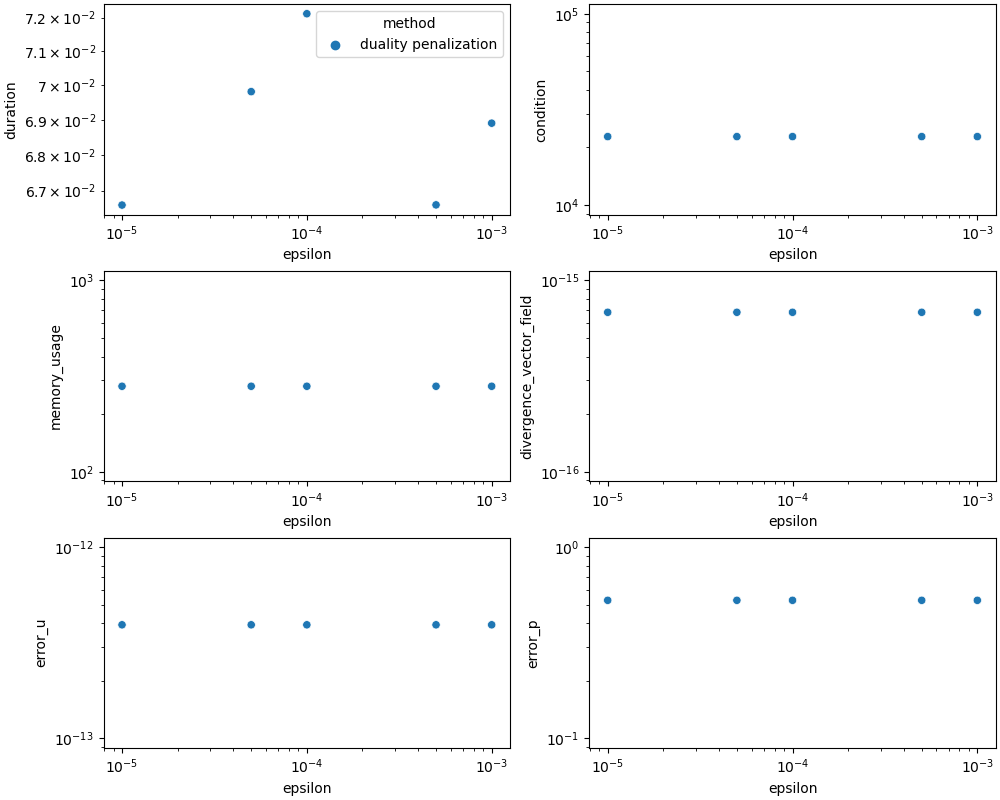

In [22]:
plot_results("epsilon", methods=["duality penalization"])